In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load your dataset
data = pd.read_csv('nk1 data.csv')

# Separate features and target variable
X = data.drop(columns=['Act'])  # Exclude the target variable

# Check if 'MOLECULE' column is in X
if 'MOLECULE' in X.columns:
    categorical_cols = ['MOLECULE']

    # Create a column transformer to handle different types of transformations
    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode 'MOLECULE' column
        ],
        remainder='passthrough'  # Remainder columns will be passed through without any transformation
    )

    # Apply preprocessing to the feature columns
    X_processed = preprocessor.fit_transform(X)

    # Extract transformed feature names and concatenate with remainder columns
    transformed_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols)
    remainder_feature_names = list(X.columns.drop(categorical_cols))
    column_names = list(transformed_feature_names) + remainder_feature_names

    # Create the processed DataFrame with updated column names
    X_processed = pd.DataFrame(X_processed, columns=column_names)

    # Display the first few rows of the processed DataFrame
    print(X_processed.head())
else:
    print("The 'MOLECULE' column is not present in the dataset.")


   MOLECULE_M_1007  MOLECULE_M_1008  MOLECULE_M_1009  MOLECULE_M_10733  \
0              0.0              0.0              0.0               0.0   
1              0.0              0.0              0.0               0.0   
2              0.0              0.0              0.0               0.0   
3              0.0              0.0              0.0               0.0   
4              0.0              0.0              0.0               0.0   

   MOLECULE_M_10752  MOLECULE_M_10755  MOLECULE_M_10758  MOLECULE_M_10760  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   MOLECULE_M_10761  MOLECULE_M_10762  ...  D_10963  D_10970  D_10996  \
0               0.0

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your preprocessed dataset or X_processed and y
# For demonstration purposes, I'll create some sample data
# Replace this with your preprocessed dataset
# X_processed = ...
# y = ...

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Scale numerical features (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network architecture
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Adjust input_dim based on number of features
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))

# Add output layer (assuming regression task)
model.add(Dense(1, activation='linear'))  # For regression; use appropriate activation for classification

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')  # Use appropriate loss and optimizer for your task

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate the model on test data
loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss}")

model.summary()


Epoch 1/50
225/225 [==============================] - 6s 22ms/step - loss: 21.1815 - val_loss: 2.3366
Epoch 2/50
225/225 [==============================] - 5s 21ms/step - loss: 3.2171 - val_loss: 4.9392
Epoch 3/50
225/225 [==============================] - 8s 35ms/step - loss: 1.9513 - val_loss: 6.1936
Epoch 4/50
225/225 [==============================] - 6s 27ms/step - loss: 0.9416 - val_loss: 6.6411
Epoch 5/50
225/225 [==============================] - 5s 24ms/step - loss: 0.4972 - val_loss: 6.6856
Epoch 6/50
225/225 [==============================] - 4s 16ms/step - loss: 0.3549 - val_loss: 7.1178
Epoch 7/50
225/225 [==============================] - 3s 15ms/step - loss: 0.2544 - val_loss: 7.5545
Epoch 8/50
225/225 [==============================] - 3s 15ms/step - loss: 0.1961 - val_loss: 7.7352
Epoch 9/50
225/225 [==============================] - 5s 20ms/step - loss: 0.1687 - val_loss: 7.8130
Epoch 10/50
225/225 [==============================] - 4s 16ms/step - loss: 0.1795 - val_l

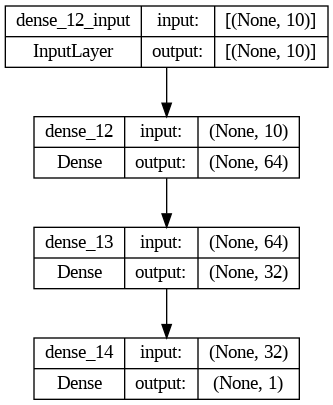

In [ ]:
# Install required packages in Google Colab
!pip install pydot graphviz

# Import necessary libraries
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define your neural network model
model = Sequential()
model.add(Dense(64, input_dim=10, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Generate a graphical representation of the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd
import numpy as np

# Your dataset with SMILES strings
data = {
    'MOLECULE': ['M_18', 'M_225', 'M_369', 'M_372', 'M_408', 'M_579', 'M_587', 'M_599', 'M_616', 'M_619', 'M_625', 'M_626', 'M_628', 'M_681', 'M_712', 'M_736', 'M_737'],
    'SMILES': ['CCO', 'CCN', 'CCOCC', 'CCO', 'CCOCC', 'CCO', 'CCO', 'CCN', 'CCOCC', 'CCO', 'CCO', 'CCO', 'CCO', 'CCO', 'CCO', 'CCO', 'CCO']
}

# Convert dataset to a DataFrame
df = pd.DataFrame(data)

# Function to generate Morgan fingerprints
def generate_morgan_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=1024)  # Morgan fingerprint with radius 2 and 1024 bits
        return np.array(list(fp.ToBitString())).astype(int)
    else:
        return np.nan

# Generate Morgan fingerprints for each molecule
df['Morgan_Fingerprint'] = df['SMILES'].apply(generate_morgan_fingerprint)

# Display the DataFrame with Morgan fingerprints
print(df)



   MOLECULE SMILES                                 Morgan_Fingerprint
0      M_18    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1     M_225    CCN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2     M_369  CCOCC  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     M_372    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4     M_408  CCOCC  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5     M_579    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
6     M_587    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
7     M_599    CCN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
8     M_616  CCOCC  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
9     M_619    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
10    M_625    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
11    M_626    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
12    M_628    CCO  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
13    M_681    CCO  

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers

# Load your prepared CSV dataset
data = pd.read_csv('nk1 data.csv')

# Split features and target variable
X = data.drop('MOLECULE', axis=1).values
y = data['Act'].values

# Split dataset into train, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Define different network architectures to experiment with
architectures = [
    [layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
     layers.Dense(32, activation='relu'),
     layers.Dense(1, activation='sigmoid')],

    [layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(1, activation='sigmoid')],

    [layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
     layers.Dense(16, activation='relu'),
     layers.Dense(8, activation='relu'),
     layers.Dense(1, activation='sigmoid')]
]

# Define different hyperparameters to experiment with
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [32, 64, 128]
epochs = 10

best_accuracy = 0.0
best_model = None
best_params = {}

for architecture in architectures:
    for lr in learning_rates:
        for batch_size in batch_sizes:
            # Build the model
            model = models.Sequential(architecture)

            # Compile the model with different hyperparameters
            optimizer = optimizers.Adam(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                                validation_data=(X_val, y_val), verbose=0)

            # Evaluate model on validation set
            _, accuracy = model.evaluate(X_val, y_val)

            # Check if current model is better than the previous best
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = model
                best_params = {
                    'architecture': architecture,
                    'learning_rate': lr,
                    'batch_size': batch_size,
                    'epochs': epochs
                }

# Check if the best_model is available before evaluating
if best_model is not None:
    # Evaluate the best model on test set
    test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
    print(f'Best model test accuracy: {test_accuracy}')
    print(f'Best hyperparameters: {best_params}')
else:
    print("No model met the conditions for improvement.")

47/47 [==============================] - 0s 2ms/step - loss: -1270393876674248704.0000 - accuracy: 0.0000e+00
No model met the conditions for improvement.


In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
train_file_path = '/content/NK1_training_disguised.csv'
test_file_path = '/content/NK1_test_disguised.csv'

# Reading the CSV file into a DataFrame
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Assuming 'df' is your DataFrame and it's already loaded with data

# Ignoring the first column, using the second column as the target, and the rest as features
X_train = train_df.iloc[:, 2:]  # Select all columns starting from the third column as features
y_train = train_df.iloc[:, 1]   # Select the second column as the target

X = train_df.iloc[:, 2:]  # Features (all columns starting from the third column)
y = train_df.iloc[:, 1]  # Target variable (the second column)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees and other parameters
# Fitting the model on the training data
rf_model.fit(X_train, y_train)
# Making predictions on the test data
y_pred_rf = rf_model.predict(X_test)

#Creating the k nearestr neighbors model
knn_model = KNeighborsRegressor(n_neighbors=5)
# Fit the model on the training data
knn_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test)

#Create the SVM Regressor model
svm_model = SVR(kernel='rbf')
# Fit the model on the training data
svm_model.fit(X_train, y_train)
# Make predictions on the test data
y_pred_svm = svm_model.predict(X_test)

# Standardizing the data
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_test_nn = scaler.transform(X_test)
# Creating the neural network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 64 neurons and 'relu' activation
model_nn.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model_nn.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (for regression)
# Compiling the model
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Training the model
model_nn.fit(X_train_nn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
mse = model_nn.evaluate(X_test_nn, y_test)
print(f"Mean Squared Error on Test Data: {mse}")

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Mean Squared Error: {mse_rf}")

mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Mean Squared Error: {mse_knn}")

mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f"Mean Squared Error: {mse_svm}")

mse_nn = model_nn.evaluate(X_test_nn, y_test)
print(f"Mean Squared Error on Test Data: {mse_nn}")

Epoch 1/100
200/200 [==============================] - 3s 13ms/step - loss: 9.8592 - val_loss: 1.9838
Epoch 2/100
200/200 [==============================] - 2s 11ms/step - loss: 3.1167 - val_loss: 2.8832
Epoch 3/100
200/200 [==============================] - 2s 8ms/step - loss: 2.5428 - val_loss: 2.9241
Epoch 4/100
200/200 [==============================] - 2s 8ms/step - loss: 2.3613 - val_loss: 1.8308
Epoch 5/100
200/200 [==============================] - 2s 8ms/step - loss: 3.0975 - val_loss: 7.2033
Epoch 6/100
200/200 [==============================] - 2s 8ms/step - loss: 2.9571 - val_loss: 1.7637
Epoch 7/100
200/200 [==============================] - 2s 8ms/step - loss: 5.3105 - val_loss: 2.1471
Epoch 8/100
200/200 [==============================] - 2s 8ms/step - loss: 0.8795 - val_loss: 2.6119
Epoch 9/100
200/200 [==============================] - 2s 11ms/step - loss: 1.0605 - val_loss: 2.6943
Epoch 10/100
200/200 [==============================] - 2s 12ms/step - loss: 1.1111 - va

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Standardizing the data
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_test_nn = scaler.transform(X_test)
# Creating the neural network model
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer with 64 neurons and 'relu' activation
model_nn.add(Dense(32, activation='relu'))  # Second hidden layer with 32 neurons
model_nn.add(Dense(1, activation='linear'))  # Output layer with 1 neuron (for regression)
# Compiling the model
model_nn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
# Training the model
model_nn.fit(X_train_nn, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
mse = model_nn.evaluate(X_test_nn, y_test)
print(f"Mean Squared Error on Test Data: {mse}")

Epoch 1/100
200/200 [==============================] - 4s 12ms/step - loss: 16.7931 - val_loss: 1.9354
Epoch 2/100
200/200 [==============================] - 2s 8ms/step - loss: 5.1062 - val_loss: 1.6228
Epoch 3/100
200/200 [==============================] - 2s 12ms/step - loss: 2.7924 - val_loss: 7.3445
Epoch 4/100
200/200 [==============================] - 2s 11ms/step - loss: 4.3837 - val_loss: 2.2301
Epoch 5/100
200/200 [==============================] - 2s 8ms/step - loss: 4.8752 - val_loss: 1.5909
Epoch 6/100
200/200 [==============================] - 2s 8ms/step - loss: 0.7808 - val_loss: 1.5291
Epoch 7/100
200/200 [==============================] - 2s 8ms/step - loss: 0.6622 - val_loss: 1.4934
Epoch 8/100
200/200 [==============================] - 2s 8ms/step - loss: 0.6840 - val_loss: 1.4210
Epoch 9/100
200/200 [==============================] - 2s 8ms/step - loss: 0.6915 - val_loss: 1.7153
Epoch 10/100
200/200 [==============================] - 2s 8ms/step - loss: 0.8075 - va

63/63 [==============================] - 1s 6ms/step


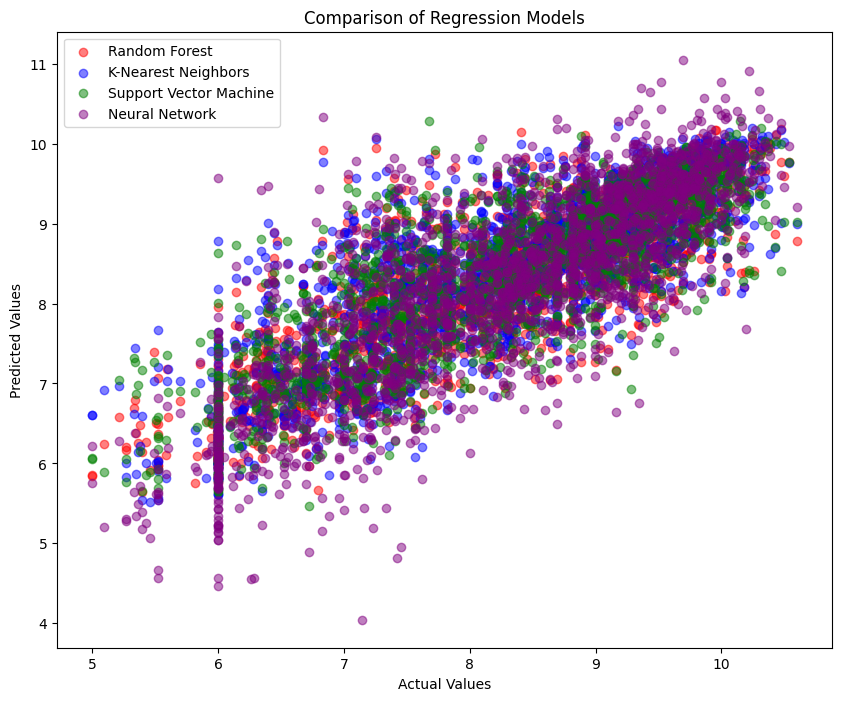

In [ ]:
import matplotlib.pyplot as plt

# Assuming y_test is your actual values
# And y_pred_rf, y_pred_knn, y_pred_svm, y_pred_nn are the predicted values from RF, KNN, SVM, and NN respectively

plt.figure(figsize=(10, 8))

y_pred_nn = model.predict(X_test).flatten()

# Plotting each model's predictions
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest', color='red')
plt.scatter(y_test, y_pred_knn, alpha=0.5, label='K-Nearest Neighbors', color='blue')
plt.scatter(y_test, y_pred_svm, alpha=0.5, label='Support Vector Machine', color='green')
plt.scatter(y_test, y_pred_nn, alpha=0.5, label='Neural Network', color='purple')

# Adding plot title and labels
plt.title('Comparison of Regression Models')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()

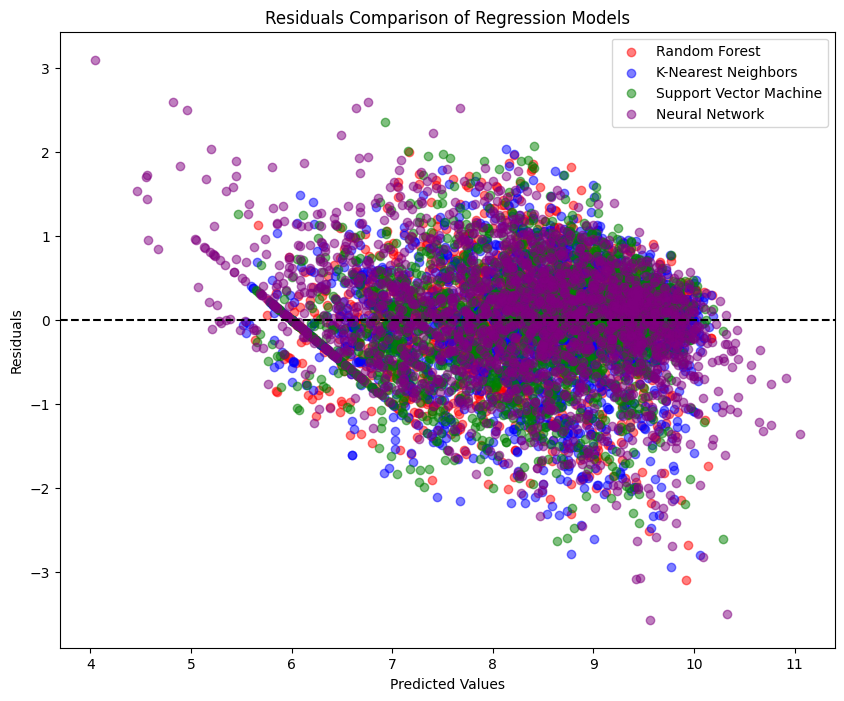

In [ ]:
residuals_rf = y_test - y_pred_rf
residuals_knn = y_test - y_pred_knn
residuals_svm = y_test - y_pred_svm
residuals_nn = y_test - y_pred_nn

# Plotting residuals for all models on the same graph
plt.figure(figsize=(10, 8))

plt.scatter(y_pred_rf, residuals_rf, alpha=0.5, color='red', label='Random Forest')
plt.scatter(y_pred_knn, residuals_knn, alpha=0.5, color='blue', label='K-Nearest Neighbors')
plt.scatter(y_pred_svm, residuals_svm, alpha=0.5, color='green', label='Support Vector Machine')
plt.scatter(y_pred_nn, residuals_nn, alpha=0.5, color='purple', label='Neural Network')

plt.title('Residuals Comparison of Regression Models')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.legend()

plt.show()

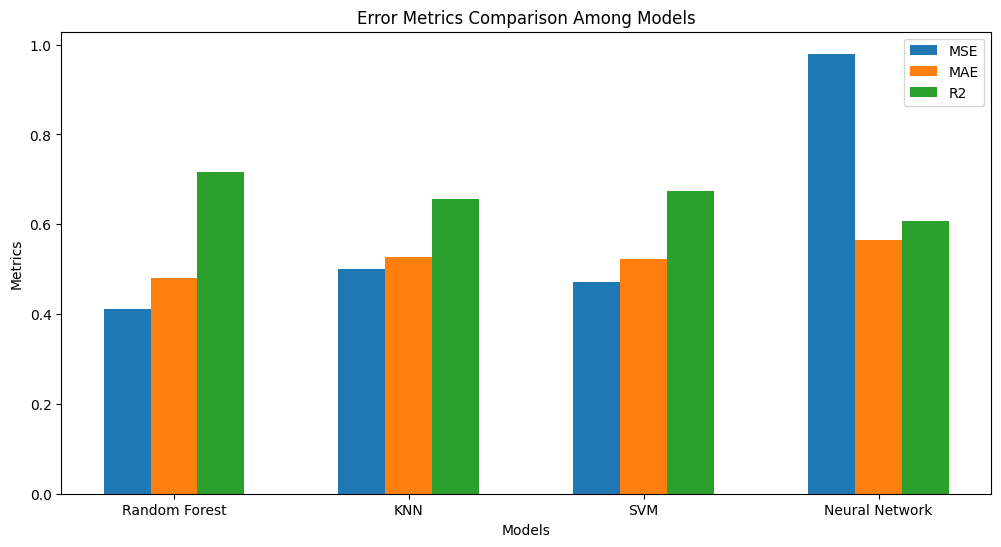

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

r2_rf = r2_score(y_test, y_pred_rf)
r2_knn = r2_score(y_test, y_pred_knn)
r2_svm = r2_score(y_test, y_pred_svm)
r2_nn = r2_score(y_test, y_pred_nn)

models = ['Random Forest', 'KNN', 'SVM', 'Neural Network']

# Error metrics
mse_values = [mse_rf, mse_knn, mse_svm, mse_nn]
mae_values = [mae_rf, mae_knn, mae_svm, mae_nn]
r2_values = [r2_rf, r2_knn, r2_svm, r2_nn]

# Creating x-tick positions
x = np.arange(len(models))

# Plotting
plt.figure(figsize=(12, 6))

plt.bar(x - 0.2, mse_values, width=0.2, label='MSE')
plt.bar(x, mae_values, width=0.2, label='MAE')
plt.bar(x + 0.2, r2_values, width=0.2, label='R2')

# Adding labels
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.title('Error Metrics Comparison Among Models')
plt.xticks(x, models)
plt.legend()

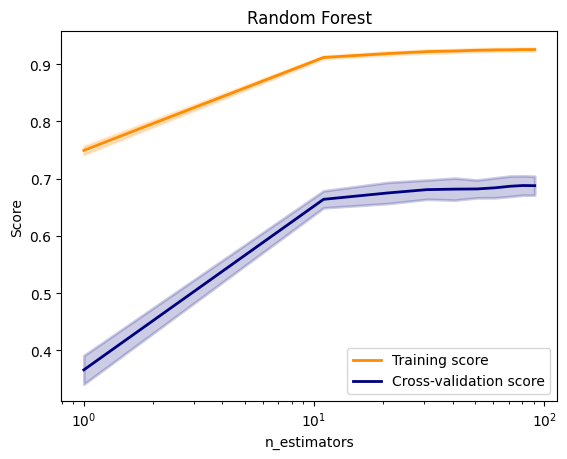

In [ ]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, title, X, y, param_name, param_range,
                          ylim=None, cv=None, n_jobs=None):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range,
        cv=cv, scoring="r2", n_jobs=n_jobs)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    if ylim is not None:
        plt.ylim(*ylim)
    lw = 2
    plt.semilogx(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()

# Example use

from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# Plotting validation curve for Random Forest
param_range_rf = np.arange(1, 101, 10)
plot_validation_curve(RandomForestRegressor(), 'Random Forest',
                      X_train, y_train, param_name="n_estimators", param_range=param_range_rf)

# Similarly, plot for KNN and SVM with their respective parameters